#Importar librerias

In [201]:
!pip install geopandas
!pip install rasterio
!pip install rioxarray
import rasterio
from shapely.geometry import Point
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import rioxarray
from geopandas import read_file as gpd_read_file
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Cargar datos

In [177]:
dem = xr.open_rasterio("/content/drive/MyDrive/CICLOS UNALM - M. Peralta/sig/examen_final/clip_dem.tif")
shp = gpd.read_file("/content/drive/MyDrive/CICLOS UNALM - M. Peralta/2022-II/SIG/limite_cuencas_shp/UH_Project.shp")
shp_cuenca_chilca=gpd.read_file("/content/drive/MyDrive/CICLOS UNALM - M. Peralta/2022-II/SIG/project_cuenca_chila/Cuenca_Chilca_Project.shp")
shp_seleccion=gpd.read_file("/content/drive/MyDrive/CICLOS UNALM - M. Peralta/2022-II/SIG/limite_query/query_uh.shp")


<ipython-input-177-cb162ca062fb>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  dem = xr.open_rasterio("/content/drive/MyDrive/CICLOS UNALM - M. Peralta/sig/examen_final/clip_dem.tif")


#Create mask

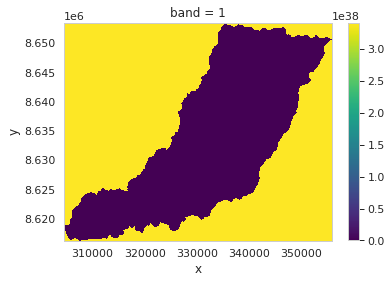

In [187]:
dem.plot()

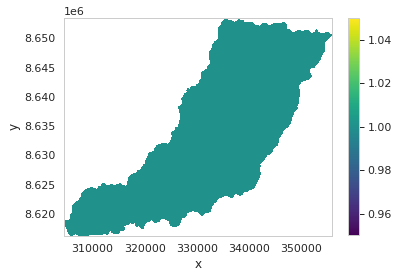

In [161]:
#creación dataarray del crop 
to_mask = dem.isel(band=0).copy()
to_mask = to_mask.to_numpy()
to_mask[to_mask < 4500] = 1
to_mask[to_mask > 4500] = np.nan
to_mask = xr.DataArray(to_mask, coords={"x":dem.x, "y":dem.y}, dims=["y","x"])
to_mask.plot()

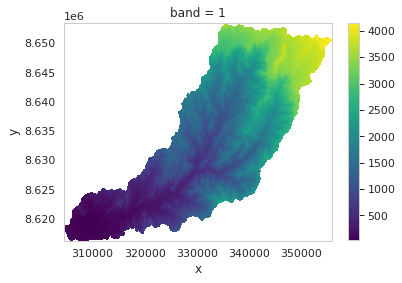

In [185]:
dem_mask=dem*to_mask
dem_mask.plot()

#Plot

In [206]:
shp_seleccion["centroid"]=shp_seleccion["geometry"].centroid
shp_seleccion.columns

Index(['OBJECTID', 'ID', 'NIVEL1', 'NIVEL2', 'NIVEL3', 'NIVEL4', 'NIVEL5',
       'NIVEL6', 'NIVEL7', 'NOMB_UH_N1', 'NOMB_UH_N2', 'NOMB_UH_N3',
       'NOMB_UH_N4', 'NOMB_UH_N5', 'NOMB_UH_N6', 'NOMB_UH_N7', 'CODIGO',
       'NOMBRE', 'ORDEN', 'AREA_KM2', 'Shape_Leng', 'Shape_Le_1', 'Shape_Le_2',
       'Shape_Area', 'geometry', 'centroid'],
      dtype='object')

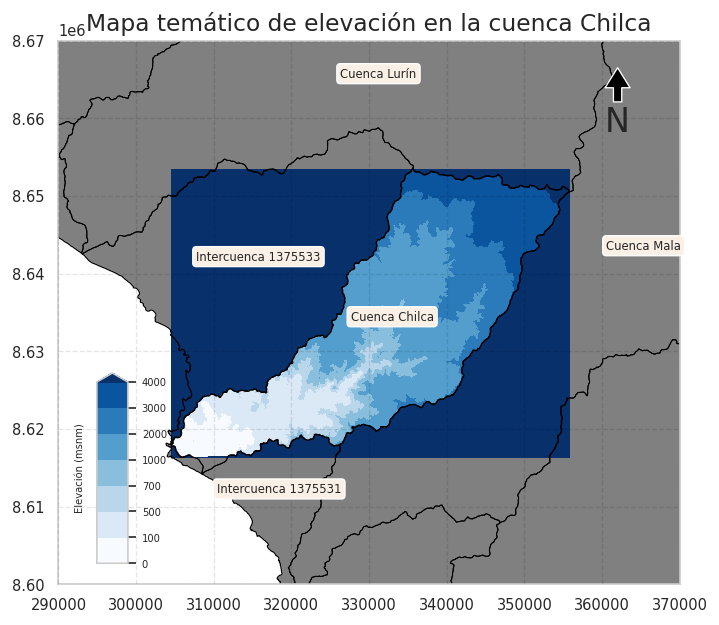

In [209]:
#seaborn

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2})

#Matplotlib
fig, ax = plt.subplots(figsize=(8, 6), dpi = 120)
ax.set_axisbelow(False)

#se coloca de color gris los shapefiles de cuencas
shp.plot(ax = ax,color="gray")
#plot del tin en raster
im = dem_mask.plot(ax = ax,cmap = "terrain", 
              levels = [0, 100, 500, 700, 1000, 2000, 3000, 4000], add_colorbar=False)

#inset colobar
axin = inset_axes(ax, width='5%', height='35%', 
                  loc = 'lower left', bbox_to_anchor = (0.05, 0.025, 1 ,1), 
                  bbox_transform = ax.transAxes)
#modificar valores del colorbar
cb = plt.colorbar(im, cax=axin, orientation = "vertical", aspect = 3)
cb.ax.set_yticklabels([0, 100, 500, 700, 1000, 2000, 3000, 4000], fontdict={"fontsize":6})
cb.ax.set_ylabel('Elevación (msnm)', labelpad=-55,fontsize=6)


#bordes de los shapefile de cuencas
shp.geometry.boundary.plot(ax = ax, edgecolor = "black", linewidth = .75)
props=dict(boxstyle="round", facecolor="linen",alpha=1)

#setup lim y e x 
ax.set_ylim(8.60e+6, 8.67e+6)
ax.set_xlim(290000, 370000)
x, y, arrow_length = 0.9, 0.95, 0.1
#setup FLECHA NORTE
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#definicion de los nombres de las cuencas
for point in shp_seleccion.iterrows():
  ax.text(point[1]["centroid"].x,
          point[1]["centroid"].y,
          point[1]["NOMBRE"],
          horizontalalignment="center",
          fontsize=7,
          bbox=props)
ax.axis("on")

#titulos de los ejes y del mapa
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Mapa temático de elevación en la cuenca Chilca",fontdict={"fontsize":"14"})

#grilla
ax.grid(True, linestyle='--', color = "black", alpha = 0.1)
#save
plt.savefig("mapa_tematico_p2.png")
plt.show()


In [ ]:


plt.figure()
image = plt.imread(cbook.get_sample_data('grace_hopper.png'))
plt.imshow(image)
scalebar = ScaleBar(0.2) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.show()